In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')

In [6]:
df.drop(columns=['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'PRODUCTLINE', 'PRODUCTCODE', 'COUNTRY', 'DEALSIZE',
                 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER', 
                 'ORDERDATE', 'STATUS', 'MONTH_ID', 'QTR_ID', 'YEAR_ID'], inplace=True)

In [7]:
df = StandardScaler().fit_transform(df)

In [9]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=15)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

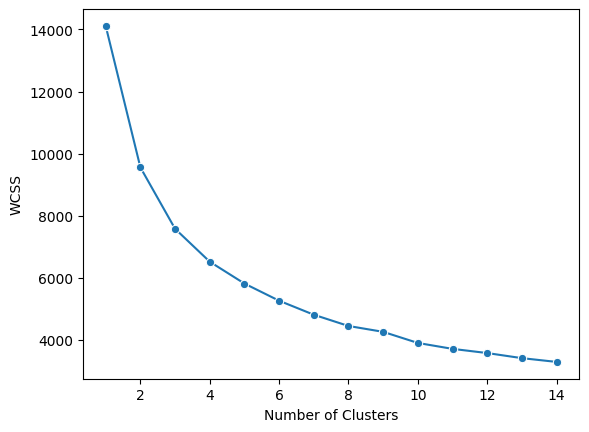

In [10]:
sns.lineplot(x=range(1, 15), y=wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [12]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=15)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=15)

In [18]:
data = kmeans.labels_

In [23]:
silhouette_avg = silhouette_score(data.reshape(-1,1), kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.3f}')